<a href="https://colab.research.google.com/github/keval47/Machine-Learning/blob/master/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import linear_model

In [0]:
boston = datasets.lod_boston

In [0]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV'] = boston.target

Y = np.array(df['MEDV'])
X = np.array(df.drop('MEDV',axis=1))
# normalize X

mean = X.mean()
std = X.std()
X = (X - mean) / std 

# add x0 ones
ones = np.ones((len(X),1),dtype=int)
X = np.concatenate((ones,X),axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [0]:
def calculate_cost(x,y,w):
#     return round( ( (np.sum( (y - np.sum((w*x),axis=1))**2 ) ) / (2*len(y)) ),3 )
    wx = np.dot(w,x)
    deriv = np.sum(( y-wx ) **2)
    err = deriv / (2*len(y))
    return err

In [0]:
def gradient_decent(x,y,alpha,theta,iters):
    err=list()
    for i in range(iters):
        theta = gradient_step(x,y,alpha,theta)
        err.append(calculate_cost(x,y,theta))
    return theta,err

In [0]:
def gradient_step(x,y,alpha,w):
    m = len(y)
    hx  = np.dot(w,x)
    pred = hx - y
    deriv = np.sum((pred[:,None]*x),axis=0 )
    w = w - ( (alpha * (1/m)) * deriv)
    return w

[  6.55723615  -6.59191006   8.44323717  -6.06986821  -2.89662897
  -3.16443115  -0.65149425  -3.01867132  -4.36933437  -0.36706735
  -1.89338106  -5.93708929   1.62911473 -19.29925881]


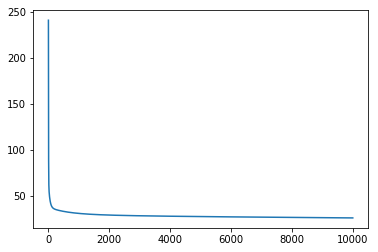

In [0]:
alpha = 0.01
theta = np.zeros(X.shape[1])
iters = 10000
theta,err = gradient_decent(X,Y,alpha,theta,iters)
plt.plot(err)
print(theta)

In [0]:
def predict(x,weights,mean,std):
    x = (x-mean)/std
    x = np.insert(x,0,1)
    return np.sum(x*weights)

In [0]:
pr = 0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
#pr = 0.958,0.1,56.69,0.0,04.585,6.027,79.7,3.4982,10.0,391.0,19.2,396.90,14.33
#pr = 0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
# pr = [2500,4,5]
predict(pr,theta,mean,std)

26.621399195857883